### 데이터 불러오기

In [150]:
df = pd.read_csv('./data/CO2 Emissions_Canada.csv')

In [151]:
df2 = df.copy()

In [152]:
# 컬럼명 쉽게 변경 

df2.rename(columns={'Fuel Consumption Comb (L/100 km)' : 'Fuel_Cons_comb_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Cons_hwy_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Consumption City (L/100 km)' : 'Fuel_Cons_city_(l/100km)'}, inplace=True)
df2.rename(columns={'Fuel Type' : 'Fuel_type'}, inplace=True)
df2.rename(columns={'CO2 Emissions(g/km)' : 'CO2_emission'}, inplace=True)


df2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel_Cons_city_(l/100km),Fuel_Cons_hwy_(l/100km),Fuel_Cons_comb_(l/100km),Fuel Consumption Comb (mpg),CO2_emission
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [153]:
### 생산 회사별로 DataFrame 나누기

In [184]:
FORD = df2[df2['Make'] == 'FORD']
CHEVROLET = df2[df2['Make'] == 'CHEVROLET']     
BMW = df2[df2['Make'] == 'BMW']
BENZ = df2[df2['Make'] == 'MERCEDES-BENZ']
PORSCHE = df2[df2['Make'] == 'PORSCHE']
TOYOTA = df2[df2['Make'] == 'TOYOTA']
GMC = df2[df2['Make'] == 'GMC']
AUDI = df2[df2['Make'] == 'AUDI']
NISSAN = df2[df2['Make'] == 'NISSAN']
JEEP = df2[df2['Make'] == 'JEEP']

## 전체 cylinder와 CO2 와의 상관관계 

In [159]:
from sklearn.model_selection import train_test_split

X = df2['Cylinders'].values
y= df2['CO2_emission'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [160]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [161]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  32.28411396985763
RMSE of Test Data :  32.9041974300707


In [162]:
# coef : 기울기, intercept : y절편

reg.intercept_, reg.coef_

(101.11555359789514, array([26.62620671]))

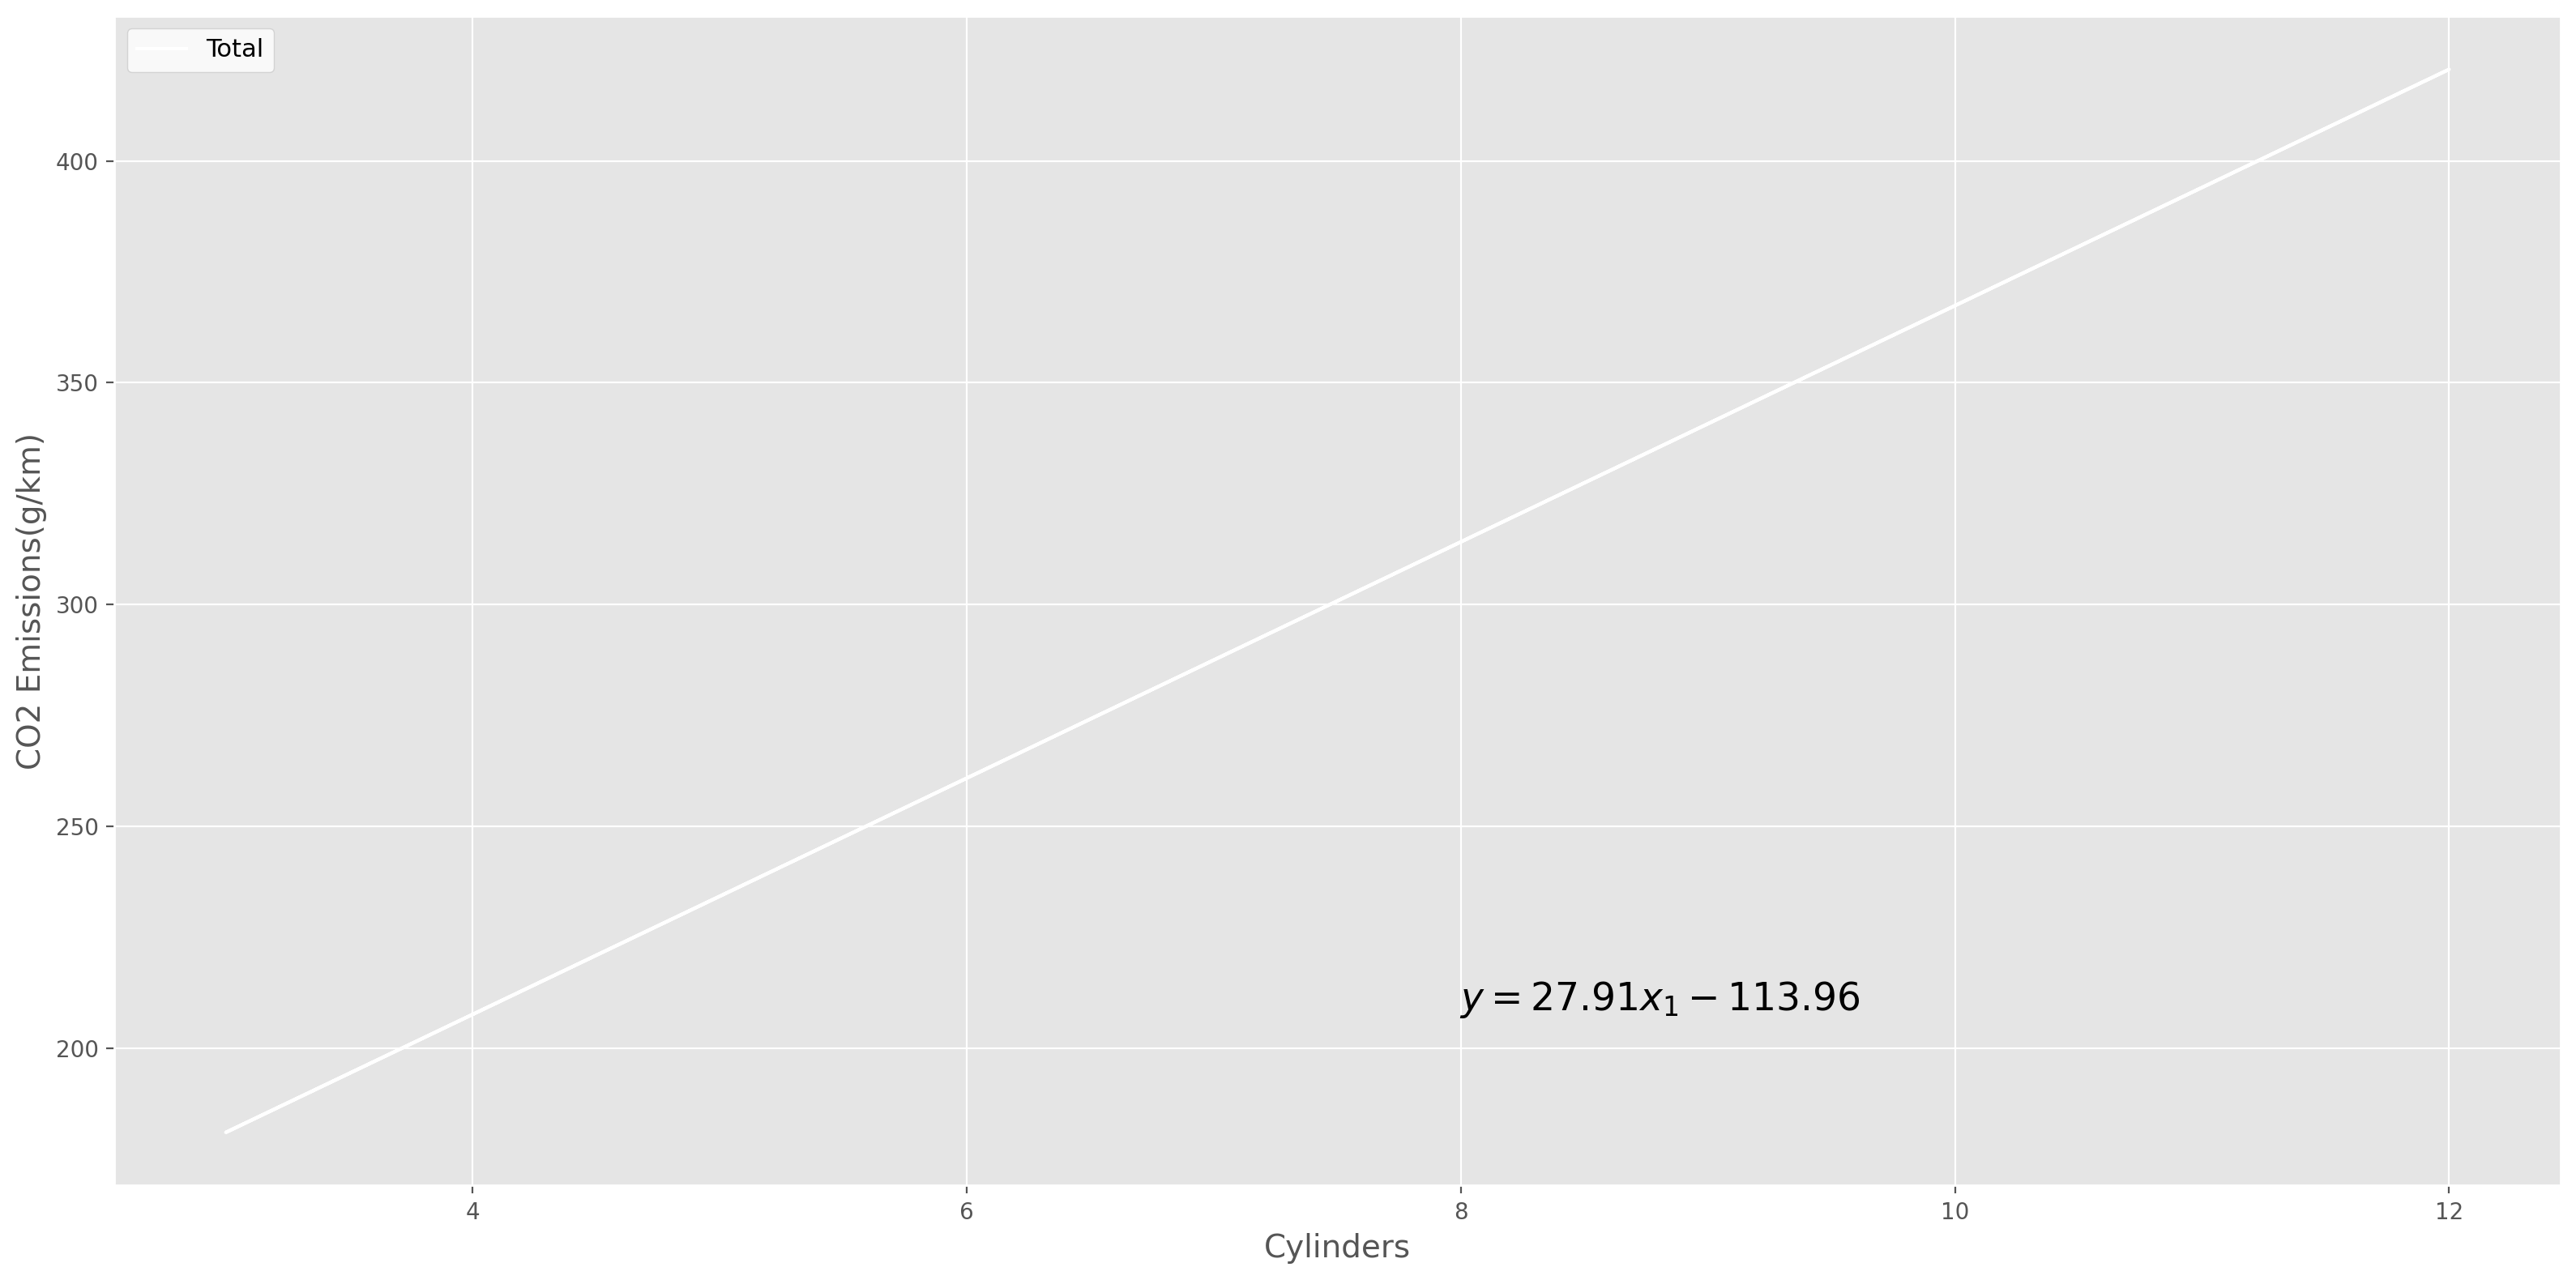

In [222]:
import matplotlib.pyplot as plt

#plt.style.use('default')
#plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(X_train, pred_tr, color='w', label='Total')

# ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.set_ylabel('CO2 Emissions(g/km)', fontsize=14)
ax.set_xlabel('Cylinders', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (reg.coef_[0], abs(reg.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

###  ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑    이 그래프 안에 10개의 회사별로 그래프를 넣으면 회사별 비교분석이 가능하겠다 !

### 실린더가 12개 넘어가는 차량은 부가티 3개가 있다. 그 이상치는 지우자 

In [156]:
df2[df2['Cylinders'] > 12]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel_Cons_city_(l/100km),Fuel_Cons_hwy_(l/100km),Fuel_Cons_comb_(l/100km),Fuel Consumption Comb (mpg),CO2_emission
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [157]:
df2.drop([4509, 5575, 6640], inplace=True)

In [158]:
df2[df2['Cylinders'] > 12]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel_Cons_city_(l/100km),Fuel_Cons_hwy_(l/100km),Fuel_Cons_comb_(l/100km),Fuel Consumption Comb (mpg),CO2_emission


# 1. 포드

In [164]:
from sklearn.model_selection import train_test_split

X_ford = FORD['Cylinders'].values
y_ford = FORD['CO2_emission'].values

X_train_ford, X_test_ford, y_train_ford, y_test_ford = train_test_split(X_ford, y_ford, test_size=0.2, random_state=13)

X_train_ford = X_train_ford.reshape(-1, 1)
X_test_ford = X_test_ford.reshape(-1, 1)

In [165]:
reg.fit(X_train_ford, y_train_ford)

LinearRegression()

In [166]:
pred_tr_ford = reg.predict(X_train_ford)
pred_test_ford = reg.predict(X_test_ford)

rmse_tr_ford = (np.sqrt(mean_squared_error(y_train_ford, pred_tr_ford)))
rmse_test_ford = (np.sqrt(mean_squared_error(y_test_ford, pred_test_ford)))

print('RMSE of Train Data : ', rmse_tr_ford)
print('RMSE of Test Data : ', rmse_test_ford)

RMSE of Train Data :  32.63825733359504
RMSE of Test Data :  30.036903476370085


In [167]:
reg.intercept_, reg.coef_

(100.224257929728, array([29.18945123]))

# 2. 쉐보레

In [168]:
from sklearn.model_selection import train_test_split

X_ch = CHEVROLET['Cylinders'].values
y_ch = CHEVROLET['CO2_emission'].values

X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(X_ch, y_ch, test_size=0.2, random_state=13)

X_train_ch = X_train_ch.reshape(-1, 1)
X_test_ch = X_test_ch.reshape(-1, 1)

In [169]:
reg.fit(X_train_ch, y_train_ch)

LinearRegression()

In [170]:
pred_tr_ch = reg.predict(X_train_ch)
pred_test_ch = reg.predict(X_test_ch)

rmse_tr_ch = (np.sqrt(mean_squared_error(y_train_ch, pred_tr_ch)))
rmse_test_ch = (np.sqrt(mean_squared_error(y_test_ch, pred_test_ch)))

print('RMSE of Train Data : ', rmse_tr_ch)
print('RMSE of Test Data : ', rmse_test_ch)

RMSE of Train Data :  36.56383947798877
RMSE of Test Data :  36.69647422229736


In [171]:
reg.intercept_, reg.coef_

(90.5522782535152, array([29.4298023]))

# 3. BMW



In [173]:
from sklearn.model_selection import train_test_split

X_bmw = BMW['Cylinders'].values
y_bmw = BMW['CO2_emission'].values

X_train_bmw, X_test_bmw, y_train_bmw, y_test_bmw = train_test_split(X_bmw, y_bmw, test_size=0.2, random_state=13)

X_train_bmw = X_train_bmw.reshape(-1, 1)
X_test_bmw = X_test_bmw.reshape(-1, 1)

In [174]:
reg.fit(X_train_bmw, y_train_bmw)

LinearRegression()

In [175]:
pred_tr_bmw = reg.predict(X_train_bmw)
pred_test_bmw = reg.predict(X_test_bmw)

rmse_tr_bmw = (np.sqrt(mean_squared_error(y_train_bmw, pred_tr_bmw)))
rmse_test_bmw = (np.sqrt(mean_squared_error(y_test_bmw, pred_test_bmw)))

print('RMSE of Train Data : ', rmse_tr_bmw)
print('RMSE of Test Data : ', rmse_test_bmw)

RMSE of Train Data :  22.809799554842883
RMSE of Test Data :  22.70987262823559


In [176]:
reg.intercept_, reg.coef_

(110.353922217193, array([23.86653494]))

# 4. BENZ

In [186]:
from sklearn.model_selection import train_test_split

X_benz = BENZ['Cylinders'].values
y_benz = BENZ['CO2_emission'].values

X_train_benz, X_test_benz, y_train_benz, y_test_benz = train_test_split(X_benz, y_benz, test_size=0.2, random_state=13)

X_train_benz = X_train_benz.reshape(-1, 1)
X_test_benz = X_test_benz.reshape(-1, 1)

In [187]:
reg.fit(X_train_benz, y_train_benz)

LinearRegression()

In [188]:
pred_tr_benz = reg.predict(X_train_benz)
pred_test_benz = reg.predict(X_test_benz)

rmse_tr_benz = (np.sqrt(mean_squared_error(y_train_benz, pred_tr_benz)))
rmse_test_benz = (np.sqrt(mean_squared_error(y_test_benz, pred_test_benz)))

print('RMSE of Train Data : ', rmse_tr_benz)
print('RMSE of Test Data : ', rmse_test_benz)

RMSE of Train Data :  34.21022881966484
RMSE of Test Data :  38.39456869620021


In [189]:
reg.intercept_, reg.coef_

(135.1633100631142, array([20.74470561]))

# 5. PORSCHE

In [191]:
from sklearn.model_selection import train_test_split

X_por = PORSCHE['Cylinders'].values
y_por = PORSCHE['CO2_emission'].values

X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.2, random_state=13)

X_train_por = X_train_por.reshape(-1, 1)
X_test_por = X_test_por.reshape(-1, 1)

In [192]:
reg.fit(X_train_por, y_train_por)

LinearRegression()

In [193]:
pred_tr_por = reg.predict(X_train_por)
pred_test_por = reg.predict(X_test_por)

rmse_tr_por = (np.sqrt(mean_squared_error(y_train_por, pred_tr_por)))
rmse_test_por = (np.sqrt(mean_squared_error(y_test_por, pred_test_por)))

print('RMSE of Train Data : ', rmse_tr_por)
print('RMSE of Test Data : ', rmse_test_por)

RMSE of Train Data :  24.533122040273938
RMSE of Test Data :  24.76870944120748


In [194]:
reg.intercept_, reg.coef_

(159.0761523046092, array([16.60604542]))

# 6 .TOYOTA

In [196]:
from sklearn.model_selection import train_test_split

X_toyo = TOYOTA['Cylinders'].values
y_toyo = TOYOTA['CO2_emission'].values

X_train_toyo, X_test_toyo, y_train_toyo, y_test_toyo = train_test_split(X_toyo, y_toyo, test_size=0.2, random_state=13)

X_train_toyo = X_train_toyo.reshape(-1, 1)
X_test_toyo = X_test_toyo.reshape(-1, 1)

In [197]:
reg.fit(X_train_toyo, y_train_toyo)

LinearRegression()

In [198]:
pred_tr_toyo = reg.predict(X_train_toyo)
pred_test_toyo = reg.predict(X_test_toyo)

rmse_tr_toyo = (np.sqrt(mean_squared_error(y_train_toyo, pred_tr_toyo)))
rmse_test_toyo = (np.sqrt(mean_squared_error(y_test_toyo, pred_test_toyo)))

print('RMSE of Train Data : ', rmse_tr_toyo)
print('RMSE of Test Data : ', rmse_test_toyo)

RMSE of Train Data :  39.714360136487336
RMSE of Test Data :  44.085292164693094


In [199]:
reg.intercept_, reg.coef_

(0.5750096413419783, array([44.47387196]))

# 7. GMC

In [201]:
from sklearn.model_selection import train_test_split

X_gmc = GMC['Cylinders'].values
y_gmc = GMC['CO2_emission'].values

X_train_gmc, X_test_gmc, y_train_gmc, y_test_gmc = train_test_split(X_gmc, y_gmc, test_size=0.2, random_state=13)

X_train_gmc = X_train_gmc.reshape(-1, 1)
X_test_gmc = X_test_gmc.reshape(-1, 1)

In [202]:
reg.fit(X_train_gmc, y_train_gmc)

LinearRegression()

In [203]:
pred_tr_gmc = reg.predict(X_train_gmc)
pred_test_gmc = reg.predict(X_test_gmc)

rmse_tr_gmc = (np.sqrt(mean_squared_error(y_train_gmc, pred_tr_gmc)))
rmse_test_gmc = (np.sqrt(mean_squared_error(y_test_gmc, pred_test_gmc)))

print('RMSE of Train Data : ', rmse_tr_gmc)
print('RMSE of Test Data : ', rmse_test_gmc)

RMSE of Train Data :  32.669341226696446
RMSE of Test Data :  35.43173095252321


In [204]:
reg.intercept_, reg.coef_

(158.63940201048206, array([20.99400722]))

# 8. AUDI

In [206]:
from sklearn.model_selection import train_test_split

X_audi = AUDI['Cylinders'].values
y_audi = AUDI['CO2_emission'].values

X_train_audi, X_test_audi, y_train_audi, y_test_audi = train_test_split(X_audi, y_audi, test_size=0.2, random_state=13)

X_train_audi = X_train_audi.reshape(-1, 1)
X_test_audi = X_test_audi.reshape(-1, 1)

In [207]:
reg.fit(X_train_audi, y_train_audi)

LinearRegression()

In [208]:
pred_tr_audi = reg.predict(X_train_audi)
pred_test_audi = reg.predict(X_test_audi)

rmse_tr_audi = (np.sqrt(mean_squared_error(y_train_audi, pred_tr_audi)))
rmse_test_audi = (np.sqrt(mean_squared_error(y_test_audi, pred_test_audi)))

print('RMSE of Train Data : ', rmse_tr_audi)
print('RMSE of Test Data : ', rmse_test_audi)

RMSE of Train Data :  23.90205299604758
RMSE of Test Data :  25.562804417296043


In [209]:
reg.intercept_, reg.coef_

(136.1412803532009, array([20.19627848]))

# 9. NISSAN

In [211]:
from sklearn.model_selection import train_test_split

X_niss = NISSAN['Cylinders'].values
y_niss = NISSAN['CO2_emission'].values

X_train_niss, X_test_niss, y_train_niss, y_test_niss = train_test_split(X_niss, y_niss, test_size=0.2, random_state=13)

X_train_niss = X_train_niss.reshape(-1, 1)
X_test_niss = X_test_niss.reshape(-1, 1)

In [212]:
reg.fit(X_train_niss, y_train_niss)

LinearRegression()

In [213]:
pred_tr_niss = reg.predict(X_train_niss)
pred_test_niss = reg.predict(X_test_niss)

rmse_tr_niss = (np.sqrt(mean_squared_error(y_train_niss, pred_tr_niss)))
rmse_test_niss = (np.sqrt(mean_squared_error(y_test_niss, pred_test_niss)))

print('RMSE of Train Data : ', rmse_tr_niss)
print('RMSE of Test Data : ', rmse_test_niss)

RMSE of Train Data :  28.329350114068042
RMSE of Test Data :  34.4109890817937


In [214]:
reg.intercept_, reg.coef_

(52.44664908284378, array([35.7866263]))

# 10. JEEP

In [216]:
from sklearn.model_selection import train_test_split

X_jeep = JEEP['Cylinders'].values
y_jeep = JEEP['CO2_emission'].values

X_train_jeep, X_test_jeep, y_train_jeep, y_test_jeep = train_test_split(X_jeep, y_jeep, test_size=0.2, random_state=13)

X_train_jeep = X_train_jeep.reshape(-1, 1)
X_test_jeep = X_test_jeep.reshape(-1, 1)

In [217]:
reg.fit(X_train_jeep, y_train_jeep)

LinearRegression()

In [218]:
pred_tr_jeep = reg.predict(X_train_jeep)
pred_test_jeep = reg.predict(X_test_jeep)

rmse_tr_jeep = (np.sqrt(mean_squared_error(y_train_jeep, pred_tr_jeep)))
rmse_test_jeep = (np.sqrt(mean_squared_error(y_test_jeep, pred_test_jeep)))

print('RMSE of Train Data : ', rmse_tr_jeep)
print('RMSE of Test Data : ', rmse_test_jeep)

RMSE of Train Data :  19.8725202888159
RMSE of Test Data :  22.98127946789951


In [219]:
reg.intercept_, reg.coef_

(113.96066252587988, array([27.91174948]))

### 여기까지하면 ... 각 회사마다 그래프를 그릴 수 있고 비교분석이 가능하다 !

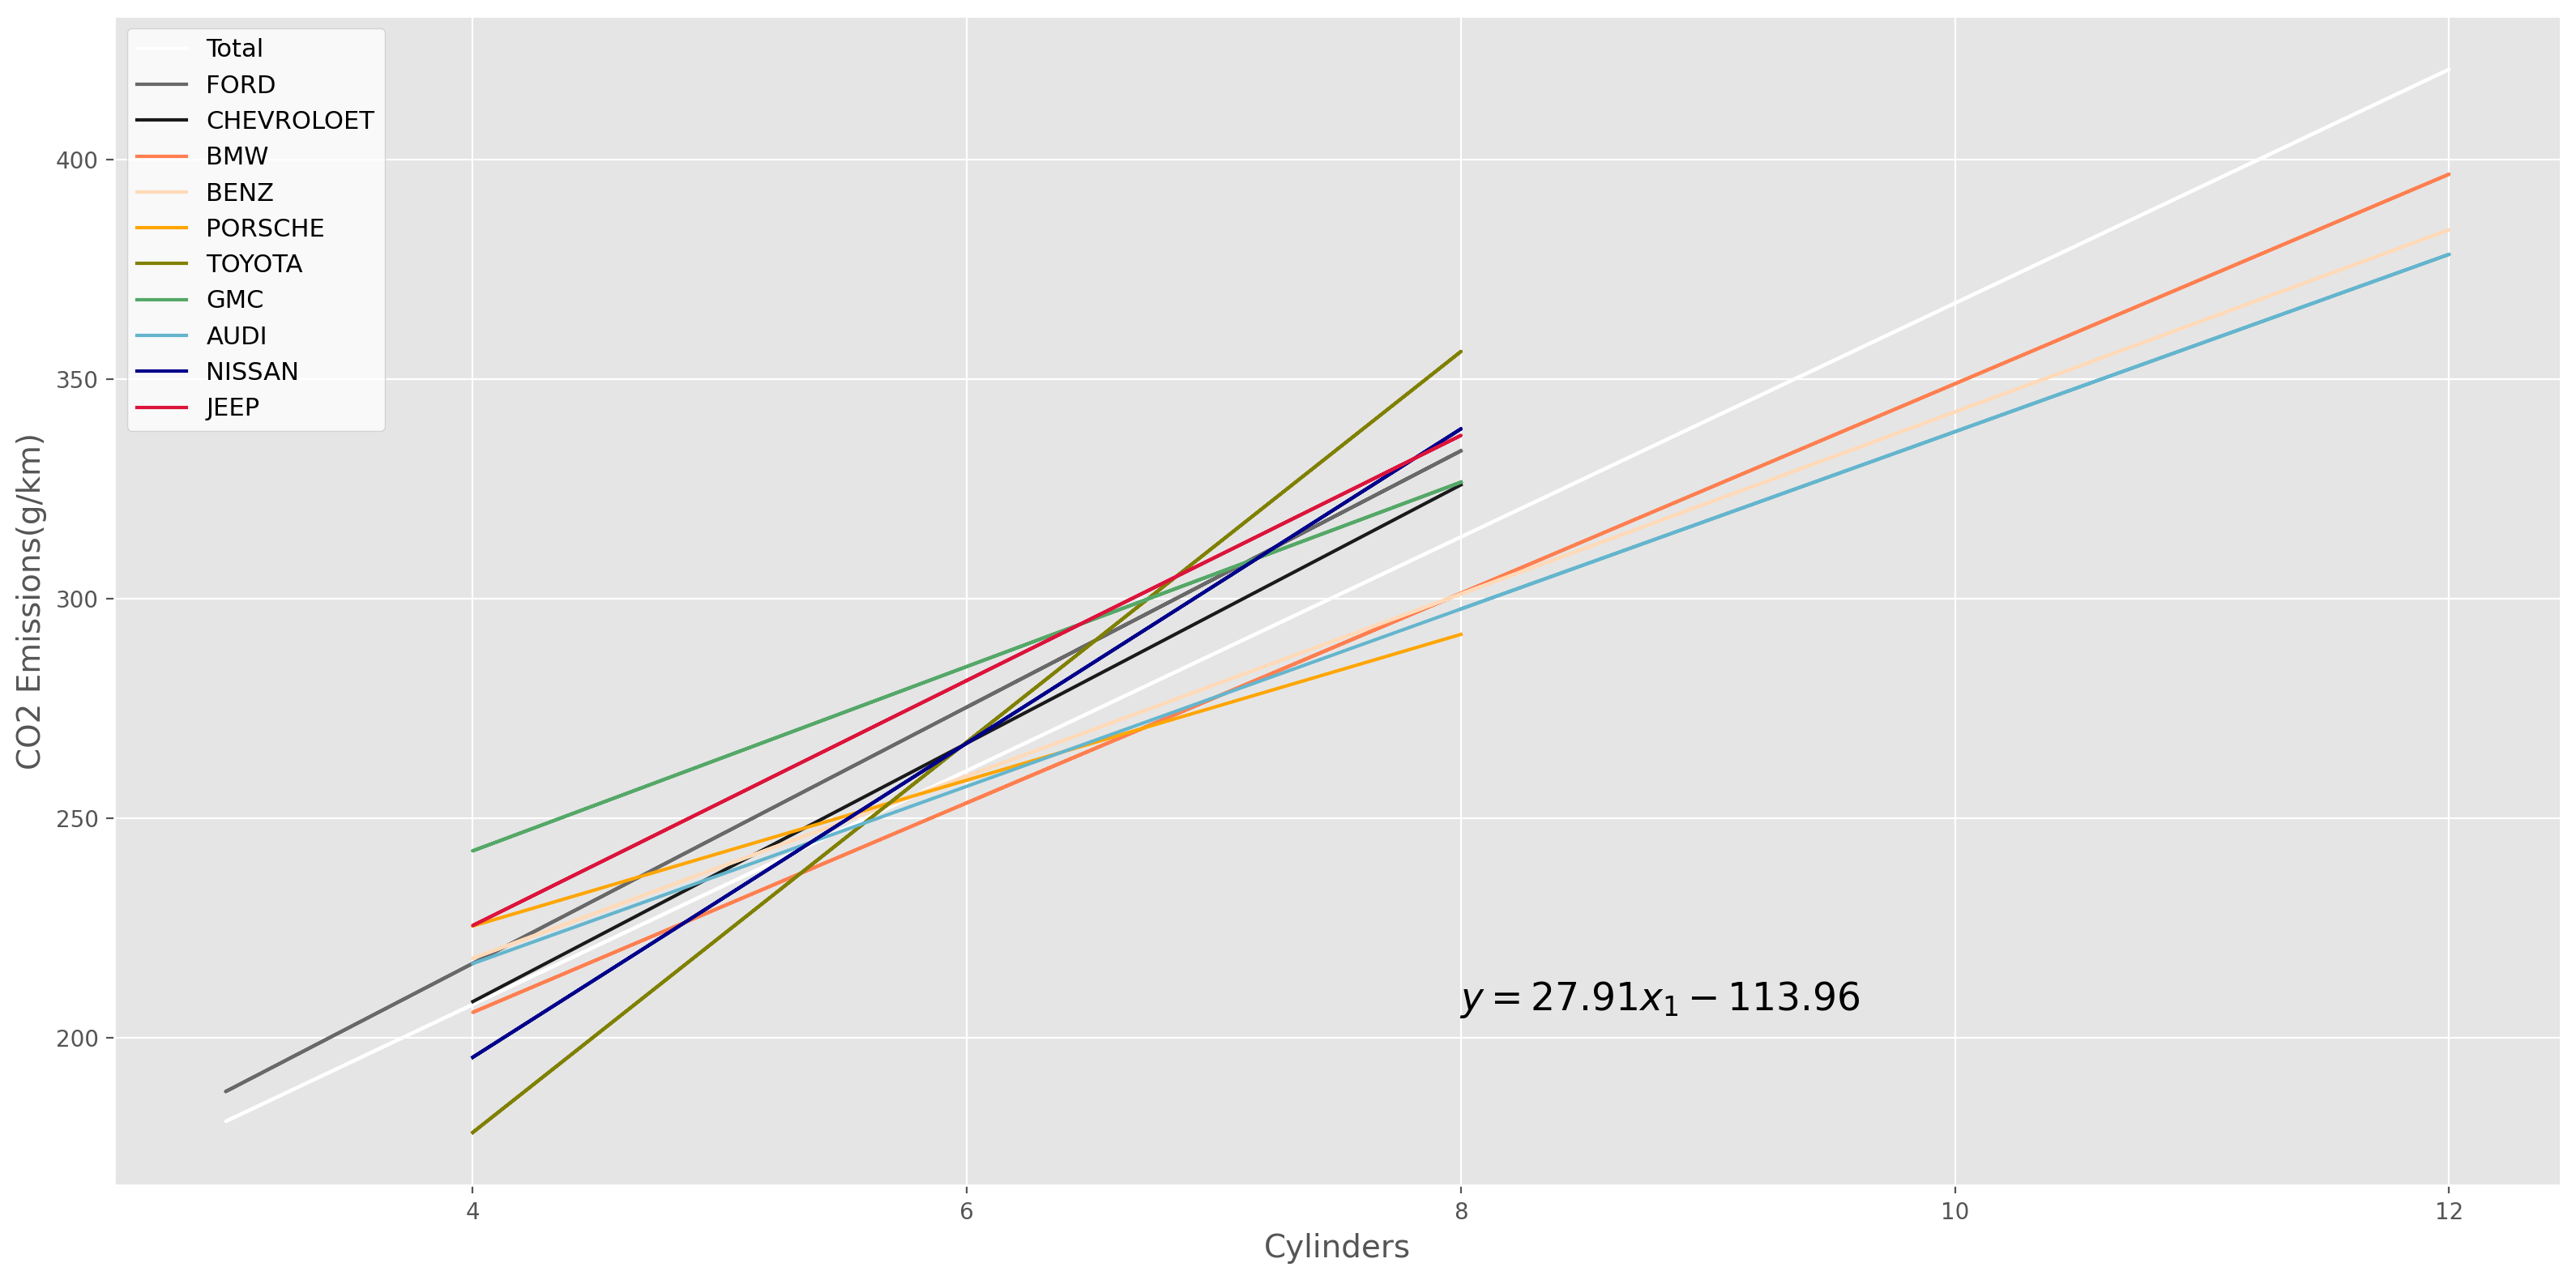

In [221]:
import matplotlib.pyplot as plt

#plt.style.use('default')
#plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(X_train, pred_tr, color='w', label='Total')
ax.plot(X_train_ford, pred_tr_ford, color='dimgray', label='FORD')
ax.plot(X_train_ch, pred_tr_ch, color='k', label='CHEVROLOET')
ax.plot(X_train_bmw, pred_tr_bmw, color='coral', label='BMW')
ax.plot(X_train_benz, pred_tr_benz, color='peachpuff', label='BENZ')
ax.plot(X_train_por, pred_tr_por, color='orange', label='PORSCHE')
ax.plot(X_train_toyo, pred_tr_toyo, color='olive', label='TOYOTA')
ax.plot(X_train_gmc, pred_tr_gmc, color='g', label='GMC')
ax.plot(X_train_audi, pred_tr_audi, color='c', label='AUDI')
ax.plot(X_train_niss, pred_tr_niss, color='darkblue', label='NISSAN')
ax.plot(X_train_jeep, pred_tr_jeep, color='crimson', label='JEEP')

# ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Test data')
ax.set_ylabel('CO2 Emissions(g/km)', fontsize=14)
ax.set_xlabel('Cylinders', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (reg.coef_[0], abs(reg.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

### 위의 회사들은 for문을 이용하여 보기 쉽게 간단하게 바꿀 수 있다 .

In [227]:
from sklearn.model_selection import train_test_split


name_list = ['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'PORSCHE', 'TOYOTA', 'GMC', 'AUDI', 'NISSAN', 'JEEP']

df_cylinder = pd.DataFrame(columns=['RMSE_train', 'RMSE_test','Coef', 'Intercept', 'Name'])

for idx, item in enumerate(name_list):
    X = df2[df2['Make'] == item]['Cylinders'].values
    y = df2[df2['Make'] == item]['CO2_emission'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    reg.fit(X_train, y_train)

    pred_tr = reg.predict(X_train)
    pred_test = reg.predict(X_test)

    res = reg.predict(np.array([2,4,6,8]).reshape(-1, 1))
    print(res.round(2))
    
    rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))
    
    df_cylinder = df_cylinder.append({'Name': name_list[idx], 'RMSE_train': rmse_tr.round(2), 'RMSE_test': rmse_test.round(2), 'Coef': reg.coef_.round(2)[0], 'Intercept': reg.intercept_.round(2)}, ignore_index=True)

    
    print(name_list[idx], 'RMSE of Train Data : ', rmse_tr.round(2), ', RMSE of Test Data : ', rmse_test.round(2), name_list[idx], 'coef_ :',reg.coef_.round(2), name_list[idx], 'intercept_ :', reg.intercept_.round(2))
    
    print()

[158.6  216.98 275.36 333.74]
FORD RMSE of Train Data :  32.64 , RMSE of Test Data :  30.04 FORD coef_ : [29.19] FORD intercept_ : 100.22

[149.41 208.27 267.13 325.99]
CHEVROLET RMSE of Train Data :  36.56 , RMSE of Test Data :  36.7 CHEVROLET coef_ : [29.43] CHEVROLET intercept_ : 90.55

[158.09 205.82 253.55 301.29]
BMW RMSE of Train Data :  22.81 , RMSE of Test Data :  22.71 BMW coef_ : [23.87] BMW intercept_ : 110.35

[176.65 218.14 259.63 301.12]
MERCEDES-BENZ RMSE of Train Data :  34.21 , RMSE of Test Data :  38.39 MERCEDES-BENZ coef_ : [20.74] MERCEDES-BENZ intercept_ : 135.16

[192.29 225.5  258.71 291.92]
PORSCHE RMSE of Train Data :  24.53 , RMSE of Test Data :  24.77 PORSCHE coef_ : [16.61] PORSCHE intercept_ : 159.08

[ 89.52 178.47 267.42 356.37]
TOYOTA RMSE of Train Data :  39.71 , RMSE of Test Data :  44.09 TOYOTA coef_ : [44.47] TOYOTA intercept_ : 0.58

[200.63 242.62 284.6  326.59]
GMC RMSE of Train Data :  32.67 , RMSE of Test Data :  35.43 GMC coef_ : [20.99] GMC i

In [229]:
df_cylinder.set_index('Name')

,RMSE_train,RMSE_test,Coef,Intercept
Name,,,,
FORD,32.64,30.04,29.19,100.22
CHEVROLET,36.56,36.70,29.43,90.55
BMW,22.81,22.71,23.87,110.35
MERCEDES-BENZ,34.21,38.39,20.74,135.16
PORSCHE,24.53,24.77,16.61,159.08
TOYOTA,39.71,44.09,44.47,0.58
GMC,32.67,35.43,20.99,158.64
AUDI,23.90,25.56,20.20,136.14
NISSAN,28.33,34.41,35.79,52.45


## 여기서 cylinder별 y값들의 값을 회사별로도 비교 

In [230]:
cyl_2 = [158.6, 149.41, 158.09, 176.65, 192.29, 89.52, 200.63, 176.53, 124.02, 169.78]
cyl_4 = [216.98, 208.27, 205.82, 218.14, 225.5, 178.47, 242.62, 216.93, 195.59, 225.61]
cyl_6 = [275.36,267.13 , 253.55 ,259.63,258.71 , 267.42 ,284.6,257.32,267.17,281.43    ]
cyl_8 = [333.74,325.99,301.29,301.12,291.92,356.37,326.59,297.71,338.74,337.25]

In [231]:
df_cylinder['Cyl_2'] = cyl_2
df_cylinder['Cyl_4'] = cyl_4
df_cylinder['Cyl_6'] = cyl_6
df_cylinder['Cyl_8'] = cyl_8

In [232]:
df_cylinder

,RMSE_train,RMSE_test,Coef,Intercept,Name,Cyl_2,Cyl_4,Cyl_6,Cyl_8
0,32.64,30.04,29.19,100.22,FORD,158.60,216.98,275.36,333.74
1,36.56,36.70,29.43,90.55,CHEVROLET,149.41,208.27,267.13,325.99
2,22.81,22.71,23.87,110.35,BMW,158.09,205.82,253.55,301.29
3,34.21,38.39,20.74,135.16,MERCEDES-BENZ,176.65,218.14,259.63,301.12
4,24.53,24.77,16.61,159.08,PORSCHE,192.29,225.50,258.71,291.92
5,39.71,44.09,44.47,0.58,TOYOTA,89.52,178.47,267.42,356.37
6,32.67,35.43,20.99,158.64,GMC,200.63,242.62,284.60,326.59
7,23.90,25.56,20.20,136.14,AUDI,176.53,216.93,257.32,297.71
8,28.33,34.41,35.79,52.45,NISSAN,124.02,195.59,267.17,338.74
9,19.87,22.98,27.91,113.96,JEEP,169.78,225.61,281.43,337.25
